Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


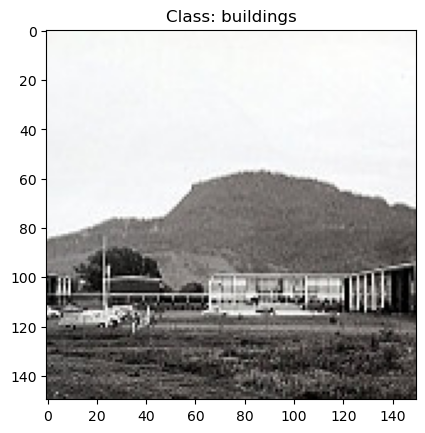

Image dimensions for buildings: (150, 150, 3)


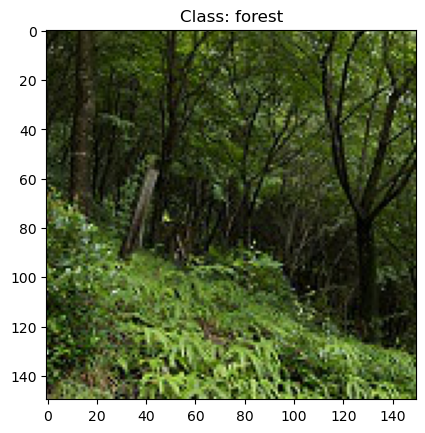

Image dimensions for forest: (150, 150, 3)


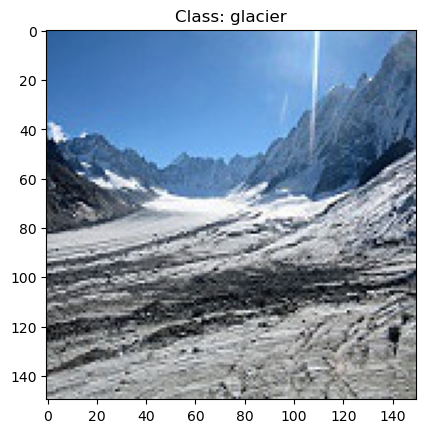

Image dimensions for glacier: (150, 150, 3)


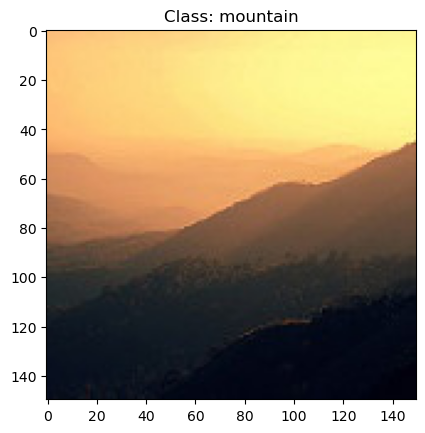

Image dimensions for mountain: (150, 150, 3)


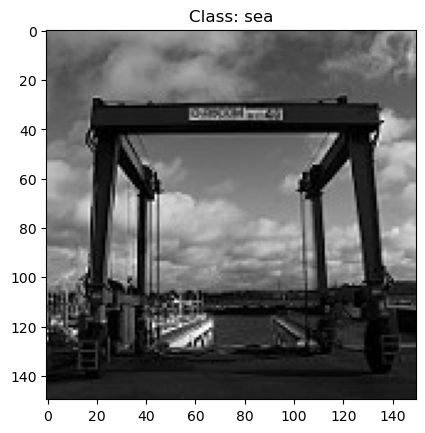

Image dimensions for sea: (150, 150, 3)


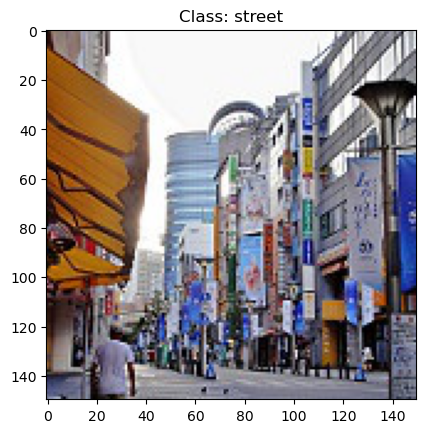

Image dimensions for street: (150, 150, 3)


In [1]:
# 1.1
# 1
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

# Define the paths to the training and test directories
train_dir = 'C:/Users/Hi/Desktop/seg_train/seg_train'
test_dir = 'C:/Users/Hi/Desktop/seg_test/seg_test'
pred_dir = 'C:/Users/Hi/Desktop/seg_pred/seg_pred'

# List the class names
CLASS_NAMES = os.listdir(train_dir)
print("Class Names:", CLASS_NAMES)

# Display one image and its dimensions from each class
for class_name in CLASS_NAMES:
    image_path = glob(os.path.join(train_dir, class_name, '*'))[0]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Class: {class_name}")
    plt.show()
    print(f"Image dimensions for {class_name}: {img.shape}")

In [2]:
# 1.1
# 2
from collections import defaultdict

def count_images_per_class(directory):
    class_counts = defaultdict(int)
    for class_name in CLASS_NAMES:
        class_counts[class_name] = len(glob(os.path.join(directory, class_name, '*')))
    return class_counts

# Count the images in the training and test sets
train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

print("Training set image counts:", train_counts)
print("Test set image counts:", test_counts)

# Compare the proportions
for class_name in CLASS_NAMES:
    print(f"{class_name}: Training - {train_counts[class_name]} images, Test - {test_counts[class_name]} images")


Training set image counts: defaultdict(<class 'int'>, {'buildings': 2191, 'forest': 2271, 'glacier': 2404, 'mountain': 2512, 'sea': 2274, 'street': 2382})
Test set image counts: defaultdict(<class 'int'>, {'buildings': 437, 'forest': 474, 'glacier': 553, 'mountain': 525, 'sea': 510, 'street': 501})
buildings: Training - 2191 images, Test - 437 images
forest: Training - 2271 images, Test - 474 images
glacier: Training - 2404 images, Test - 553 images
mountain: Training - 2512 images, Test - 525 images
sea: Training - 2274 images, Test - 510 images
street: Training - 2382 images, Test - 501 images


In [3]:
# 1.2
import tensorflow as tf

# Define the image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Load the training and validation datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    shuffle=True,
    label_mode="categorical"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    shuffle=True,
    label_mode="categorical"
)

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    shuffle=False,
    label_mode="categorical"
)

# Normalize the datasets
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


In [4]:
# 2.1
from tensorflow.keras import layers, models

# Define a simple model
simple_model = models.Sequential([
    layers.Flatten(input_shape=IMG_SIZE + (3,)),
    layers.Dense(len(CLASS_NAMES), activation='softmax')
])

# Compile the model
simple_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
history_simple = simple_model.fit(train_dataset,
                                  validation_data=validation_dataset,
                                  epochs=10)

# Evaluate the model on the test data
test_loss, test_acc = simple_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10


C:\Users\Hi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3268 - loss: 7.6745 - val_accuracy: 0.4113 - val_loss: 4.7805
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4335 - loss: 3.5246 - val_accuracy: 0.3892 - val_loss: 4.6871
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4472 - loss: 4.2457 - val_accuracy: 0.3664 - val_loss: 4.7832
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4853 - loss: 2.9367 - val_accuracy: 0.4294 - val_loss: 3.1199
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5085 - loss: 2.8099 - val_accuracy: 0.3681 - val_loss: 3.4393
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5089 - loss: 2.7167 - val_accuracy: 0.3489 - val_loss: 5.5784
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5044 - loss: 3.5405 - val_accuracy: 0.3706 - val_loss: 5.7417
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5386 - loss: 2.8419 - val_accuracy: 0.446

In [5]:
# 2.2
from tensorflow.keras import layers, models
import keras_tuner as kt

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=IMG_SIZE + (3,)))
    
    # Tune the number of hidden layers and the size of each layer
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dropout(hp.Float('dropout_' + str(i), 0.0, 0.5)))

    # Output layer
    model.add(layers.Dense(len(CLASS_NAMES), activation='softmax'))

    # Compile the model
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Set up the tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='my_dir',
                        project_name='image_classification')

# Run the tuner
tuner.search(train_dataset, validation_data=validation_dataset, epochs=10)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on the test data
test_loss, test_acc = best_model.evaluate(test_dataset)
print(f"Test Accuracy of best model: {test_acc}")

Trial 5 Complete [00h 01m 33s]
val_accuracy: 0.1803278625011444

Best val_accuracy So Far: 0.507127583026886
Total elapsed time: 00h 25m 57s


C:\Users\Hi\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4202 - loss: 1.3741
Test Accuracy of best model: 0.4856666624546051


In [6]:
# 2.3
# 1
# The more complex classifier had a better accuracy on the test data compared to the simple classifier. 
# This is likely due to the additional hidden layers and dropout, which allow the model to learn more complex patterns in the data.
# 2
# The more complex classifier had a lower degree of overfitting. 
# This can be attributed to the use of dropout layers, which help prevent overfitting by randomly dropping units during training, and the hyperparameter tuning, which optimizes the model's architecture and learning rate.


In [7]:
# 3.1
# Define a CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE + (3,)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(CLASS_NAMES), activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

# Evaluate the model on the test data
test_loss, test_acc = cnn_model.evaluate(test_dataset)
print(f"Test Accuracy of CNN model: {test_acc}")


Epoch 1/10


C:\Users\Hi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 92s 255ms/step - accuracy: 0.5087 - loss: 1.2872 - val_accuracy: 0.7035 - val_loss: 0.8163
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 90s 255ms/step - accuracy: 0.7495 - loss: 0.6747 - val_accuracy: 0.7733 - val_loss: 0.6043
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 90s 257ms/step - accuracy: 0.8154 - loss: 0.5148 - val_accuracy: 0.7708 - val_loss: 0.6674
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 91s 258ms/step - accuracy: 0.8684 - loss: 0.3667 - val_accuracy: 0.7833 - val_loss: 0.6851
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 91s 258ms/step - accuracy: 0.9131 - loss: 0.2596 - val_accuracy: 0.7844 - val_loss: 0.8362
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 92s 262ms/step - accuracy: 0.9518 - loss: 0.1440 - val_accuracy: 0.7773 - val_loss: 0.9213
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 91s 259ms/step - accuracy: 0.9545 - loss: 0.1247 - val_accuracy: 0.7712 - val_loss: 1.1126
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 91s 259ms/step - accuracy: 0.9722 - loss: 0.0838 - val

In [8]:
# 3.2
# Load the pre-trained MobileNet model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add a new classification head
model_mobilenet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(CLASS_NAMES), activation='softmax')
])

# Compile the model
model_mobilenet.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
model_mobilenet.fit(train_dataset, validation_data=validation_dataset, epochs=10)

# Evaluate the model on the test data
test_loss, test_acc = model_mobilenet.evaluate(test_dataset)
print(f"Test Accuracy of MobileNet model: {test_acc}")

C:\Users\Hi\AppData\Local\Temp\ipykernel_4276\1779364002.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 101s 272ms/step - accuracy: 0.7661 - loss: 0.6325 - val_accuracy: 0.8888 - val_loss: 0.3130
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 270ms/step - accuracy: 0.9038 - loss: 0.2709 - val_accuracy: 0.8924 - val_loss: 0.3016
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 97s 275ms/step - accuracy: 0.9170 - loss: 0.2320 - val_accuracy: 0.8963 - val_loss: 0.3034
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 270ms/step - accuracy: 0.9254 - loss: 0.2111 - val_accuracy: 0.9013 - val_loss: 0.2817
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 271ms/step - accuracy: 0.9284 - loss: 0.1986 - val_accuracy: 0.8956 - val_loss: 0.3066
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 272ms/step - accuracy: 0.9335 - loss: 0.1849 - val_accuracy: 0.8991 - val_loss: 0.2845
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 272ms/step - accuracy: 0.9350 - loss: 0.1777 - val_accuracy: 0.9009 - val_loss: 0.2892
Epoch 8/10
351/351 ━━━━━━━━━━━━━━

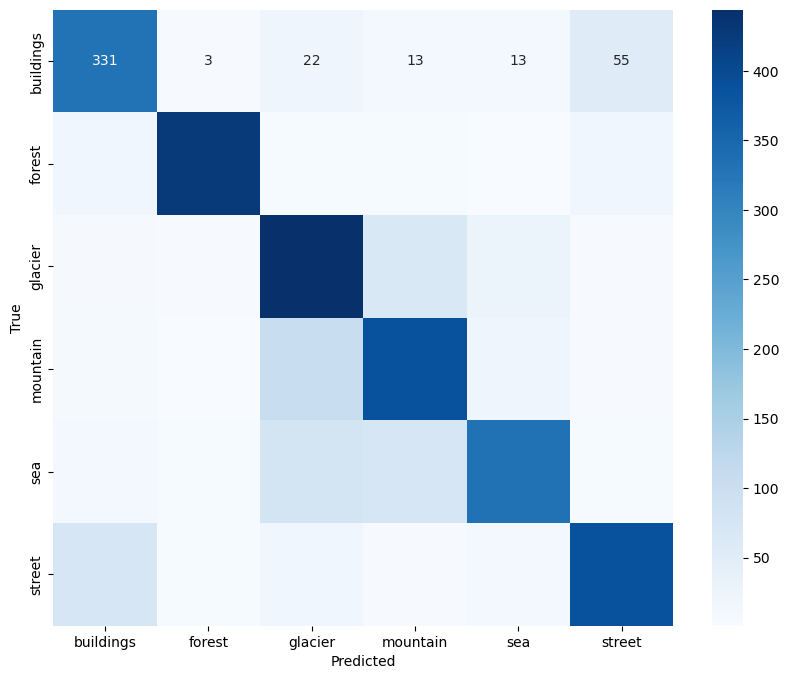

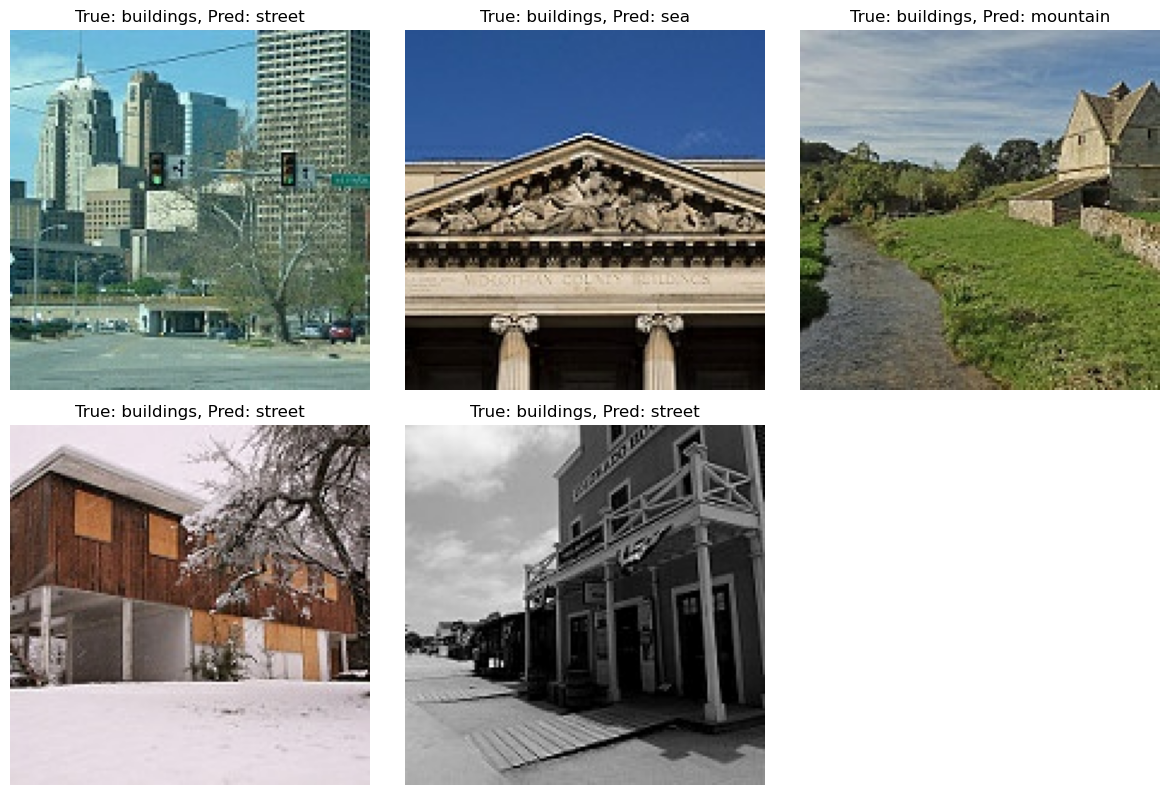

In [15]:
# 3.3
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Identify misclassified indices
misclassified_idx = np.where(y_true != y_pred_classes)[0]

# Display 5 unique misclassified images
plt.figure(figsize=(12, 12))

for i, idx in enumerate(misclassified_idx[:5]):
    # Retrieve the image and true/predicted labels
    image_batch, label_batch = list(test_dataset)[idx // BATCH_SIZE]
    image = image_batch[idx % BATCH_SIZE]
    true_label = CLASS_NAMES[y_true[idx]]
    predicted_label = CLASS_NAMES[y_pred_classes[idx]]
    
    # Plot the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
